# Analiza wybranych danych rzeczywistych z wykorzystaniem metod statystyki opisowej

Yana Negulescu

08 maja, 2023

---

## Spis treści:

1. Wstęp
    - opis danych,
    - wykres przedstawiający dane.
2. Podstawowe statystyki
    - miary położenia, rozproszenia, asymetrii, spłaszczenia,
    - interpretacja wyników.
3. Wizualizacja danych
    - m.in. histogramy, wykres pudełkowy, dystrybuanta empiryczna, gęstość empiryczna.
    - interpretacja wyników.
4. Podsumowanie

---

## 1. Wstęp
### Opis danych

Będziemy rozwarzać [ceny akcji](https://www.wsj.com/market-data/quotes/MCD/historical-prices) McDonald's po otwarciu handlu (pierwsza kolumna) za ostatni rok. Długość próby wynosi 250.

Pobieranie danych:

In [1]:
import csv
import numpy as np

daneMC=[]
with open("HistoricalPrices.csv", newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')

    for row in spamreader:
        try:
            x=float(row[1])
            daneMC.append(x)
        except:
            pass

daneMC=np.array(daneMC)


FileNotFoundError: [Errno 2] No such file or directory: 'HistoricalPrices.csv'

### Wykres przedstawiający dane

Żeby przedstawić dane, policzmy ich **logarytmiczną stopę**, a zatem z tego narysujemy wykres.$$r_i = \ln{\biggl(\cfrac{K_{i+1}}{K_i}\biggr)}$$

In [127]:
import pandas as pd

dict1 = {'col_1':daneMC}
df_MC = pd.DataFrame(dict1)
df_MC["d_after"] = df_MC["col_1"].shift(-1)
df_MC = df_MC.fillna(df_MC["col_1"].iloc[-1])
df_MC["log_return"] = np.log(df_MC["d_after"]/df_MC["col_1"])
df_MC=df_MC.drop(df_MC.index[-1])

data = df_MC["log_return"]
n = len(data)
print(n)

249


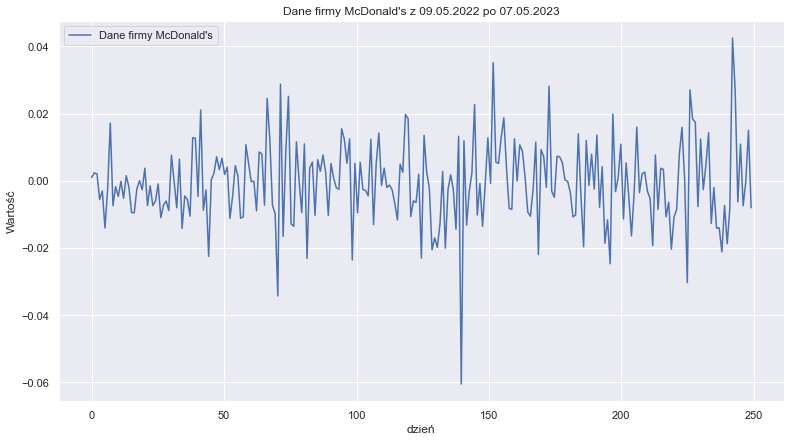

In [128]:
import matplotlib.pyplot as plt

t=np.linspace(0, n, n)
plt.figure(figsize=[13,7])
plt.plot(t, data, label="Dane firmy McDonald's")
plt.xlabel("dzień")
plt.ylabel("Wartość")
plt.title("Dane firmy McDonald's z 09.05.2022 po 07.05.2023")
plt.legend()
plt.show()

---

## 2. Podstawowe statystyki
### Miary położenia, rozproszenia, asymetrii, spłaszczenia

Najpierw znajdziemy **minimalny**, **maxymalny** **element** danych oraz policzymy **srednią symetryczną** $(\overline{x})$ i **średnią harmoniczną** $(h_n)$: $$\overline{x} = \cfrac{\sum_i{x_i}}{n}$$ oraz $$h_n = \cfrac{n}{\sum_{i}{\cfrac{1}{x_i}}}$$


In [129]:
min_element = min(data)
max_element = max(data)
x_sym  = sum(data)/n
h_n = n/sum(1/data[i] for i in range(n))

print('Minimalny element danych', min_element)
print('Maxymalny element danych', max_element)
print('Średnia symetryczna danych', x_sym)
print('Średnia harmoniczna danych', h_n)


Minimalny element danych -0.06048913236056906
Maxymalny element danych 0.042483358788097655
Średnia symetryczna danych -0.0007236698338437032
Średnia harmoniczna danych -0.05646582279756546


Policzmy **kwartyle**:

In [130]:
Kwartyl_rzędu25 = np.quantile(data,0.25)
Kwartyl_rzędu50 = np.quantile(data,0.5)
Kwartyl_rzędu75 = np.quantile(data,0.75)

print('Kwartyl rzędu 25 danych', Kwartyl_rzędu25)
print('Kwartyl rzędu 50 danych', Kwartyl_rzędu50)
print('Kwartyl rzędu 75 danych', Kwartyl_rzędu75)

Kwartyl rzędu 25 danych -0.008233726186943097
Kwartyl rzędu 50 danych -0.0013855748502599474
Kwartyl rzędu 75 danych 0.006317044818526892


Policzmy **medianą** $(m)$: $$m = 
 \begin{cases}
   x_{(n+1)/2}, \qquad\qquad\quad \text{dla }  n \text{ nie parzystych}\\
   \cfrac{x_{n/2}+x_{(n+1)/2}}{2}, \quad \text{dla } n \text{ parzystych}
 \end{cases}$$ 

qdzie $x_1, x_2, ..., x_n$ są zdefiniowane jako:  $x_1 \le x_2 \le ... \le x_n$

Mamy $n = 249$ więc korzystamy z pierwszego wzoru:

In [131]:
data_sortowana = sorted(data)
mediana = data_sortowana[125]

print('Mediana danych', mediana)

Mediana danych -0.001346948637361469


Znajdziemy **warjancję** $(D^2X)$ oraz **wartość oczekiwaną** $(EX)$:

In [132]:
D_2X = np.var(data, ddof=1)
EX = np.mean(data)

print('Warjancja danych', D_2X)
print('Wartość oczekiwana danych', EX)

Warjancja danych 0.00014980714183564646
Wartość oczekiwana danych -0.0007236698338437032


Policzmy **odchylenie standardowe** $(s)$, **kurtozą** $(\mathbb{Kurt})$ oraz **skosność** $(A)$: $$s = \sqrt{D^2X}$$ $$\mathbb{Kurt} = \cfrac{n(n+1)}{(n-1)(n-2)(n-3)}\sum_i{\biggl(\cfrac{x_i-\overline{x}}{s}\biggr)^4}-\cfrac{3(n-1)^2}{(n-2)(n-3)}$$ $$A = \cfrac{3(\overline{x}-m)}{s}$$

In [133]:
odchylenie_standardowe = np.sqrt(D_2X)
kurtozis = ((n*(n+1))/((n-1)*(n-2)*(n-3)))*sum(((data[i]-x_sym)/odchylenie_standardowe)**4 for i in range(n))-((3*(n-1)**2)/((n-2)*(n-3)))
skosnosc = (3*(x_sym-mediana))/odchylenie_standardowe

print('Odchylenie standardowe danych', odchylenie_standardowe)
print('Kurtoza danych', kurtozis)
print('Skosność danych', skosnosc)

Odchylenie standardowe danych 0.0122395727799481
Kurtoza danych 2.417882143041065
Skosność danych 0.1527697448408184


### Interpretacja wyników

Na podstawie dostarczonych miar statystycznych można dokonać następujących interpretacji kursu akcji McDonald's za ostatni rok:

*Średnia symetryczna* danych wynosi -0,0007, co sugeruje, że dane rozkładają się mniej więcej równomiernie wokół wartości średniej.

*Średnia harmoniczna* danych wynosi -0,0565, co wskazuje, że w zbiorze danych wystąpiły pewne znaczące ujemne zwroty logarytmiczne.

*Kwartyl rzędu 25* to -0,0082, *kwartyl rzędu 50 (mediana)* to -0,0013, a *kwartyl rzędu 75* to 0,0063. Wskazuje to, że znaczna część danych mieści się w przedziale międzykwartylowym od -0,0082 do 0,0063.

*Wariancja* wynosi 0,00015, co sugeruje, że punkty danych są stosunkowo bliskie wartości średniej.

*Wartość oczekiwana* to -0,0007, co odpowiada średniej symetrycznej danych.

*Odchylenie standardowe* wynosi 0,0122, co wskazuje, że punkty danych są rozproszone wokół wartości średniej.

*Kurtoza* wynosi 2,4179, co wskazuje, że zbiór danych ma rozkład z dużymi ogonami z wyższym niż normalne prawdopodobieństwo skrajnych zwrotów.

*Skośność* wynosi 0,1528, co sugeruje, że zbiór danych jest umiarkowanie przesunięty w prawo, co oznacza, że po prawej stronie rozkładu znajduje się dłuższy ogon.

Ogólnie, dostarczone podstawowe miary statystyczne wskazują, że cena akcji McDonald's w ciągu ostatniego roku odnotowała zarówno dodatnie, jak i ujemne zwroty logarytmiczne, z kilkoma znaczącymi zwrotami ujemnymi. Dane rozkładają się stosunkowo równomiernie wokół wartości średniej, ale mają rozkład z dużymi ogonami z wyższym niż normalne prawdopodobieństwo skrajnych zwrotów. Zestaw danych jest umiarkowanie przesunięty w prawo, co wskazuje, że po prawej stronie rozkładu znajduje się dłuższy ogon.

---

## 3. Wizualizacja danych
### Histogram, wykres pudełkowy, dystrybuanta empiryczna, gęstość empiryczna.

Interpretacja wykresów dystrybuanty i gęstości empirycznej, oraz wykresu pudełkowego może zapewnić cenny wzgląd na dane.

Narysujemy **histogram** oraz **gęstość empiryczną**:

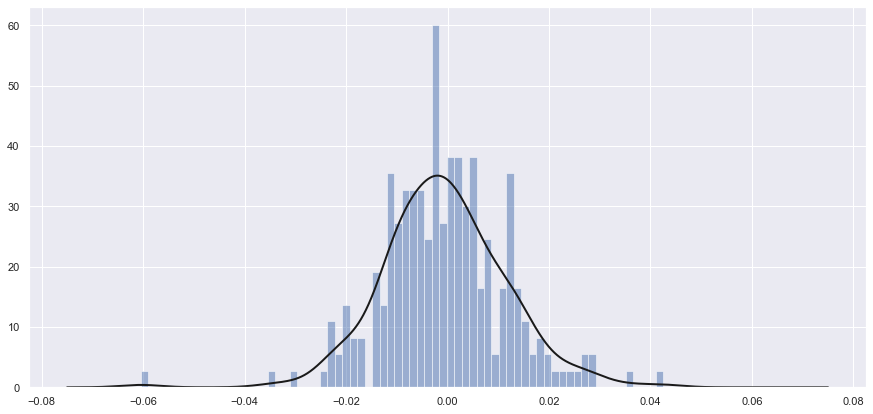

<Figure size 936x576 with 0 Axes>

In [137]:
import scipy.stats as stats

plt.hist(data, bins = 70, density=True, alpha=0.5)

kde = stats.gaussian_kde(data)
x = np.linspace(-0.075, 0.075, 10000)

plt.plot(x, kde(x), 'k-', linewidth=2)
plt.figure(figsize=(13, 8))
plt.show()

Wykrez **dystrybuanty empirycznej** oraz **dystrybuanty teorytycznej** dla rozkładu normalnego z parametrem $\sigma = 0,011$:

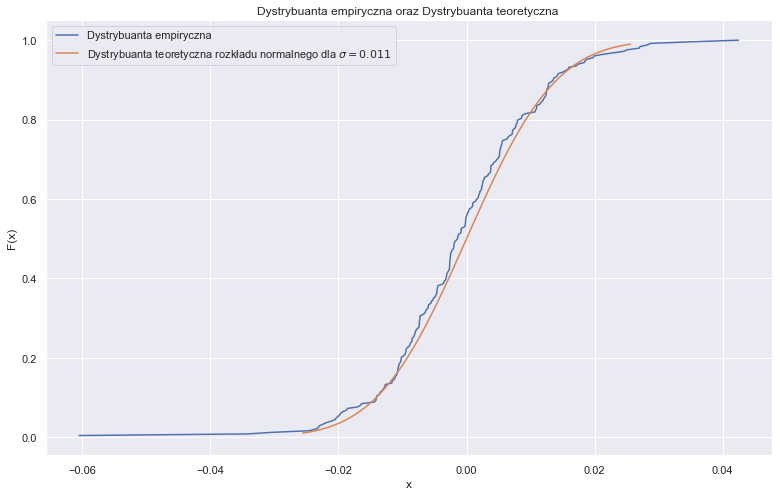

In [151]:
from statsmodels.distributions.empirical_distribution import ECDF

dystrybemp=ECDF(data)
plt.figure(figsize=(13, 8))
plt.plot(dystrybemp.x, dystrybemp.y, label="Dystrybuanta empiryczna")

x = np.linspace(stats.norm.ppf(0.01,scale=0.011), stats.norm.ppf(0.99,scale=0.011), 100)
plt.plot(x, stats.norm.cdf(x,scale=0.011),label=r"Dystrybuanta teoretyczna rozkładu normalnego dla $\sigma =0.011$")

plt.xlabel('x')
plt.ylabel('F(x)')
plt.title("Dystrybuanta empiryczna oraz Dystrybuanta teoretyczna ")
plt.legend()
plt.show()

**Wykres pudełkowy**:

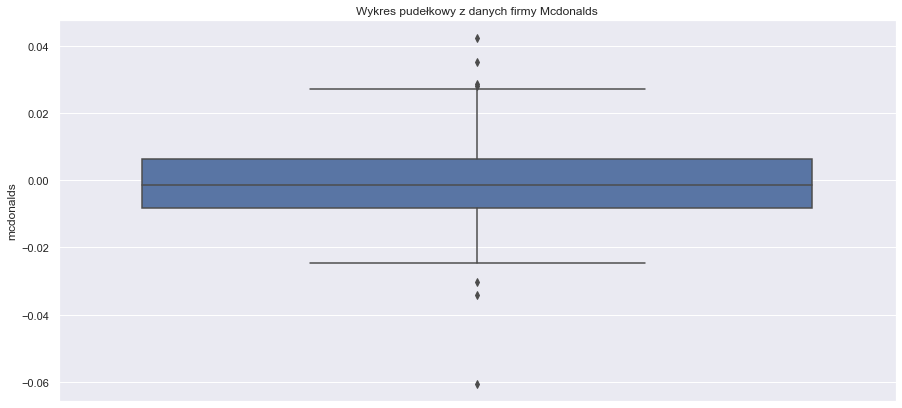

In [148]:
import seaborn as sns
sns.boxplot(y="log_return",data=df_MC).set(title='Wykres pudełkowy z danych firmy Mcdonalds',xlabel='', ylabel='mcdonalds')
plt.show()

### Interpretacja wyników

*Dystrybucja empiryczna*:
Wykres rozkładu empirycznego przedstawia skumulowany rozkład ceny akcji McDonald's za ostatni rok. Oś x przedstawia cenę akcji, a oś y przedstawia skumulowane prawdopodobieństwo. Wykres pokazuje, że większość cen akcji mieści się w przedziale między X i Y, a poza tym zakresem występują pewne wartości skrajne. Sugeruje to, że cena akcji nie ma rozkładu normalnego i może występować pewna zmienność na rynku.

*Gęstość empiryczna*:
Oś x reprezentuje cenę akcji, a oś y reprezentuje gęstość. Wykres pokazuje, że gęstość jest największa między X a Y, co wskazuje, że ten zakres cen akcji jest najbardziej powszechny. Istnieją również pewne powiększenia i zmniejszenia wartości poza linią gęstości, oznacza to, rynek akcji jest raczej nieprzewidywalny i nie ma określonego rozkłada.

*wykres pudełkowy*:
Wykres pudełkowy przedstawia rozkład ceny akcji McDonald's w ciągu ostatniego roku w postaci kwartyli. Ramka reprezentuje środkowe 50% danych, podczas gdy wąsy obejmują wartości minimalne i maksymalne, które nie są uważane za wartości odstające. Wartości odstające są reprezentowane jako pojedyncze punkty. Wykres pudełkowy pokazuje, że większość cen akcji mieści się w przedziale X i Y, z pewnymi wartościami odstającymi przy wyższych wartościach. Sugeruje to, że na rynku może występować pewna zmienność, ale ogólnie cena akcji pozostaje względnie stabilna w środkowych 50% wartości.

## 4. Podsumowanie

Zrobiliśmy analizę cen akcji McDonalds za ostatni rok. Zobaczyliśmy, że chociaż dane nie mają rozkłada normalnego, oni są w jego pobliżu. Ale czym więcej będziemy brali danych tym więcej rozkład danych będzie pochodził na rozkład normalny.

Histogram i wykres gęstości empirycznej pokazują, że dane mają w przybliżeniu rozkład normalny, ale nie są dosyć stabilne. Wykres pudełkowy wskazuje, że w danych są wartości odstające.

Stopy logarytmiczne akcji McDonald's mają średnią symetryczną bliską zeru, co wskazuje, że akcje nie są znacząco obciążone dodatnimi lub ujemnymi stopami zwrotu. Odchylenie standardowe dziennika zwrotów nie jest stosunkowo niskie, co wskazuje, że akcje charakteryzują się stosunkowo dużą zmiennością i nie są inwestycją o niskim ryzyku.

Ogólnie, akcje McDonald's nie wydają się zbyt stabilnymi. Jednak przy podejmowaniu decyzji inwestycyjnych inwestorzy powinni brać pod uwagę szersze warunki rynkowe i czynniki ekonomiczne.